In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

color_blind_list = sns.color_palette()

# TP4 - Bagging and Random Forests

Math question : Let us consider L binary independent classifiers where the probability of a correct
prediction is p > 0.5. Then, the prediction of the aggregation of models follows a Binomial distribution
with parameters p and L (Why ?).

The binomial distribution describes the binary outcome (success/failure) of an experiment repeated multiple times: this can be applied very easily to our situation, where the aggregation of models corresponds to the repetition of the experiment. Moreover, prediction can be either right or wrong, thus reconducing us to a binary outcome, and they are independent, since each models don't interact between them (and for hypothesis).

Having satisfied the above requirements, we can say that the aggregated prediction follows a Binomial distribution with parameters p and L, where p is the probability of success (correct prediction) of the single model corresponding to the probability of success of the single outcome and L is the number of times the experiment is repeated.

1) If p = 0.7 (which means a probability slightly greater than by chance) and L = 10, which is the
probability of correct prediction for the aggregation of models ?

In order to get a correct prediction for the aggregation of models, supposing we are using the majority vote rule, we need to have at least L/2 + 1 correct predictions from models. We can easily compute this probability using the cumulative density function of a binomial distribution.

In [63]:
L=10
p=0.7
# Since cdf equality returns minor AND equal, 1 - cdf should be computed on L/2 (x > 5 -> 6, 7, 8...)
h = L/2
proba = 1 - binom.cdf(h, L, p)
print('Probability of correct prediction for aggregated models: ' + str(proba))

Probability of correct prediction for aggregated models: 0.8497316674


1) Use Bagging with first decision trees of depth 1 (called stumps) and then with decision trees
characterized by a greater depth. Use the following code :

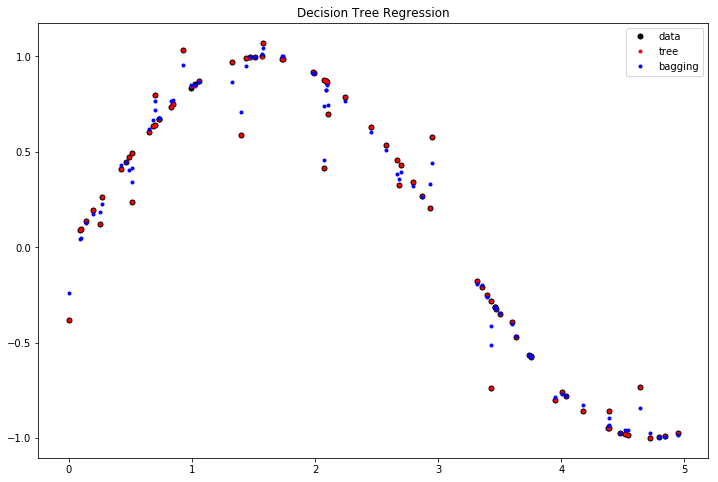

Tree score: 0.9999959548074236
Bagging score: 0.9931894880366264


In [64]:
# Function used to create Bagging Sample
def createBaggingSamples(data, num_sample=1):
    sample = []
    while len(sample) < num_sample:
        index = np.random.randrange(0, len(dataset))
        sample.append(dataset[index])
    return sample

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

n_estimators = 10 # L in the text
tree_max_depth = 10

tree = DecisionTreeRegressor(max_depth=tree_max_depth)
tree.fit(X, y)
bagging = BaggingRegressor(base_estimator=tree, n_estimators=n_estimators)
bagging.fit(X, y)

# Scores on training data (with max depth, for cycle has ended)
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c='k', ms=5, label='data')
plt.plot(X, tree.predict(X), 'o', c='r', ms=3, label='tree')
plt.plot(X, bagging.predict(X), 'o', c='b', ms=3, label='bagging')
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

print('Tree score: ' + str(tree.score(X, y)))
print('Bagging score: ' + str(bagging.score(X, y)))

Accuracy is extremely high in trees with max depth almost certainly meaning that trees are overfit.
Bagging performs slightly worse: in an overfitted scenario such as this one, the introduced randomization doesn't improve the accuracy. Let's test this hypotesis by plotting tree/bagging depth versus their accuracy, to observe eventual changes.

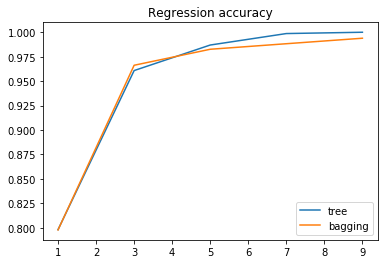

In [68]:
# TODO define the regressor by bagging stumps
depths = range(1,tree_max_depth,2)
trees = {}
bags = {}

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X, y)
    trees[depth] = tree
    bagging = BaggingRegressor(base_estimator=tree, n_estimators=n_estimators)
    bagging.fit(X, y)
    bags[depth] = bagging

res_trees = []
res_bag = []
for depth in depths:
    res_trees.append(trees[depth].score(X,y))
    res_bag.append(bags[depth].score(X,y))
    
plt.figure()
plt.plot(depths, np.array(res_trees), label='tree')
plt.plot(depths, np.array(res_bag), label='bagging')
plt.title("Regression accuracy")
plt.legend(loc=4, numpoints=1)
plt.show()

2) Graphically illustrate the roles of L and of the tree depth (max_depth).

3) How can we check that the estimators computed with the decision trees are biased and that the ones based on bagging reduce the variance ?
Bias is 

4) Playing with the noise level, show the over-fitting (sur-apprentissage).

5) Show that we can reduce this phenomenon by randomly sub-sampling (sous-échantillonner) without replacement instead than taking the bootstrap samples.

6) Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston, diabetes, iris and digits. Compare the performances with the ones of a linear SVM.

7) Using the data-set iris, limited to the first two variables/features, show the prediction probabilities for each class. Start from the following script where you will vary the number of random trees (parameter n_estimators)

In [67]:
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
# TODO use predict to obtain the probabilities you will store in Z
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

IndentationError: expected an indented block (<ipython-input-67-21bbbeca94cf>, line 21)

8) Compare the scores between Random Forests with a 6-fold cross-validation and the pure decision
trees (obtained with DecisionTreeClassifier), on the data-set iris limited to the first two
features/variables. Vary the parameter max_depth between 1 and 30. Show that both Random
Forests and deep decision trees reduce the over-fitting